Copyright 2019 The TensorFlow Authors.

[ ]Licensed under the Apache License, Version 2.0 (the "License");
Github : Laurence Moroney

Added model and weights saving 

Install required dependencies. If you are running on Google colab these dependencies are already installed so you do not need to run this. 

**Run this only if you are on a local machine by creating a virtual environment / in the available virtual environment**

In [ ]:
# How to install and check tensorflow version
!pip install keras
!pip install tensorflow

# Check if tensorflow is the latest version  - currently 2.2.0
import tensorflow as tf
print(tf.__version__)  

2.2.0


In [ ]:
# Train your first neural network

# Do the necessary imports
import keras
import numpy as np



# Define your model using keras.Sequential(), here we use keras directly and are not using tensorflow's keras which is available 
# as tensorflow.keras.___
# Keras.layers
# y = 3x - 2
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error' )
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-5.0, -2.0, 1.0, 4.0, 7.0, 10.0], dtype=float)
model.fit(xs, ys, epochs=500)
print(model.predict([10.0]))

Epoch 1/500
6/6 [==============================] - 0s 5ms/step - loss: 31.5697
Epoch 2/500
6/6 [==============================] - 0s 902us/step - loss: 25.6245
Epoch 3/500
6/6 [==============================] - 0s 771us/step - loss: 20.9310
Epoch 4/500
6/6 [==============================] - 0s 815us/step - loss: 17.2225
Epoch 5/500
6/6 [==============================] - 0s 740us/step - loss: 14.2894
Epoch 6/500
6/6 [==============================] - 0s 581us/step - loss: 11.9665
Epoch 7/500
6/6 [==============================] - 0s 609us/step - loss: 10.1241
Epoch 8/500
6/6 [==============================] - 0s 430us/step - loss: 8.6601
Epoch 9/500
6/6 [==============================] - 0s 446us/step - loss: 7.4939
Epoch 10/500
6/6 [==============================] - 0s 489us/step - loss: 6.5625
Epoch 11/500
6/6 [==============================] - 0s 448us/step - loss: 5.8160
Epoch 12/500
6/6 [==============================] - 0s 491us/step - loss: 5.2153
Epoch 13/500
6/6 [==============

**Now we move on towards building our own Image classification model. Here we use a combination of convolutional layers, amx pool layers and our regular Dense layers in order to improve our accuracy and prediction.**


We get the Fashion MNIST dataset available in the Tensorflow Datasets api which makes it easier to load the data.


![Fashion MNIST Dataset](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

In [ ]:
# Build and run your own Neural netowrk

#Do necessary imports and check tensorflow version
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

2.2.0


In [ ]:
# Load Fashion MNIST data from tensorflow datasets : https://www.tensorflow.org/api_docs/python/tf/data/Dataset
mnist = tf.keras.datasets.fashion_mnist

# Split data into training and testing images and labels
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


Shape of Training Images is :  (60000, 28, 28)
The label for training image is :  9
The training image :  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
 

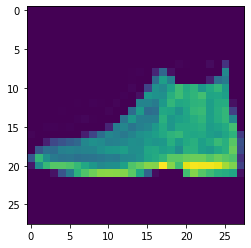

In [ ]:
# Check whether the data is correctly loaded and split
plt.imshow(training_images[0])
plt.imshow(test_images[0])
print("Shape of Training Images is : " , training_images.shape)
print("The label for training image is : " , training_labels[0])
print("The training image : " , training_images[0])


In [ ]:
# We normalize the data, as we checked the image had values 0 to 255 which is huge if we keep convolving, so we normalize by dividing it by 255
# So the values remain between 0 to 1 , for easier and faster computation
training_images=training_images / 255.0
test_images=test_images/255.0

# We reshape the data so as to have a valid tensor of 60000X28X28X1 set of images i.e 60000 images of 28X28X1
# this is necessary for determining the imput shape for TensorFlow
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)


In [ ]:
# TF Documentation : Sequential groups a linear stack of layers into a tf.keras.Models
model = tf.keras.models.Sequential([
  # Generate 64 filters of size 3X3
  # Relu activation means negative values go away 
  # Input shape on the input, 1 is using single byte for color as images are grayscale
  # Take a look at input shape and output shape , no batch_size so None - (batch_size, height, width, depth)
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),

  # Max pooling as we will take maximum value which is a 2X2 poll so wvery 4 pixels go to 1
  tf.keras.layers.MaxPooling2D(2, 2),

  # Another layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Converts the input to 1D set instead of the square we saw earlier
  tf.keras.layers.Flatten(),

  # Adds a layer of neurons
  tf.keras.layers.Dense(128, activation='relu'),

  # The last layers have specific number of neurons, ask me why! :)
  # Softmax helps you take the largest value and convert it to 1, again is it max pool? No? Then ask.
 
  tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Compile the model using the following params
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
# Start the model training
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4405 - accuracy: 0.8399
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2940 - accuracy: 0.8927
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2473 - accuracy: 0.9087
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2154 - accuracy: 0.9198
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1882 - accuracy: 0.9288


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
#See results
print("Test loss is  : ", test_loss , "Test accuracy is : ", test_acc)


313/313 [==============================] - 1s 4ms/step - loss: 0.2677 - accuracy: 0.9061
Test loss is  :  0.2676897644996643 Test accuracy is :  0.9060999751091003


In [ ]:
# Try predicting
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[7.5450102e-10 1.0538788e-11 4.5720572e-10 2.1204907e-09 1.2934337e-10
 5.2137144e-05 6.5748529e-10 1.3821776e-04 1.7839370e-09 9.9980968e-01]
9


In [ ]:
# save the model and weights now with format as tf format or save as h5
model.save(filepath='/tmp', save_format='tf')
model.save_weights(filepath='/tmp')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/assets
